In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
sns.set (style= 'whitegrid', color_codes = True)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv(r"C:\Users\gradadm09\Desktop\Natalie\Wayfair-Babson_HackathonData 2019.csv")

In [4]:
data_deleted = data.drop(['State','UniqueVisitID','VisitDate'],axis = 1)
data_deleted.head()

,Purchased,VisitorGroup,PlatformUsed,VisitSource,BrowserName,OSName,Gender,IncomeRange,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket
0,0,Prior Visitor with Purchase,Web,ThirdPartyAds,Chrome,Mac OS X,Female,100to250k,0,0,1,0,0,0,0
1,0,New Visitor,Phone,WebSearch,Safari,iOS,NaN,NaN,1,0,9,0,230,0,0
2,0,New Visitor,Web,WebSearch,Chrome,Windows,NaN,NaN,0,0,28,0,10412,0,0
3,0,Prior Visitor with Purchase,Phone,EmailFromWayfair,Safari,iOS,Female,100to250k,1,1,8,1,430,0,0
4,0,New Visitor,Phone,ThirdPartyAds,Safari,iOS,NaN,NaN,1,1,9,0,1158,0,0


In [193]:
data_fillnan = data_deleted.fillna(method = 'ffill') # fill in the NaN using the row before the row with null value
data_fillasunknown = data_deleted.fillna("Unknown") # fill in the NaN using "Unknown"
data_fillall = data_deleted.replace("Unknown",np.nan).fillna(method = 'ffill') # replace "Unknown" using NaN, and fill in the NaN
data_deletenan = data_deleted.dropna(axis = 0,how = 'any') # drop all rows with null value
data_deleteall = data_deleted.replace("Unknown",np.nan).dropna(axis = 0,how = 'any') # drop all rows with null value or "Unknown" value
data_deleteage = data_deleted.drop(['Gender'],axis = 1) # drop Gender

In [9]:
data_fill_as_unknown = data_deleted.fillna("Unknown") # fill in the NaN using "Unknown"

In [11]:
data = data_fill_as_unknown
data.head()

,Purchased,VisitorGroup,PlatformUsed,VisitSource,BrowserName,OSName,Gender,IncomeRange,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket
0,0,Prior Visitor with Purchase,Web,ThirdPartyAds,Chrome,Mac OS X,Female,100to250k,0,0,1,0,0,0,0
1,0,New Visitor,Phone,WebSearch,Safari,iOS,Unknown,Unknown,1,0,9,0,230,0,0
2,0,New Visitor,Web,WebSearch,Chrome,Windows,Unknown,Unknown,0,0,28,0,10412,0,0
3,0,Prior Visitor with Purchase,Phone,EmailFromWayfair,Safari,iOS,Female,100to250k,1,1,8,1,430,0,0
4,0,New Visitor,Phone,ThirdPartyAds,Safari,iOS,Unknown,Unknown,1,1,9,0,1158,0,0


In [170]:
#data.isnull().sum()

In [195]:
data_income = data.dropna(axis = 0, subset=['IncomeRange'])

In [171]:
#sns.countplot( x = 'IncomeRange', data = data_income, palette = 'hls')

In [62]:
# Divide data set into 3 groups
income_group = ['High_income','Med_income','Low_income']

High_income = data_income[data_income['IncomeRange'] == '100to250k'].drop(['IncomeRange'],axis = 1)
Med_income = data_income[data_income['IncomeRange'] == '50to100k'].drop(['IncomeRange'],axis = 1)
Low_income = data_income[data_income['IncomeRange'] == 'Under50k'].drop(['IncomeRange'],axis = 1)

In [63]:
#  Analyze price sensitivity of each data set

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

In [172]:
# Create dummy variables  
def create_dummy_income(df):
    category_vars= ['VisitorGroup', 'PlatformUsed', 'VisitSource',
       'BrowserName', 'OSName', 'Gender']
    df = pd.get_dummies(df, columns = category_vars, drop_first = True)
    return df
   
def logistic_model(df):    
    df = create_dummy_income(df)
    print(df.columns)
    logr = LogisticRegression()
    X = df.iloc[:,1:].values
    y = df.iloc[:,0].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 30)
    logr.fit(X_train,y_train)
    y_pred_test = logr.predict(X_test)
    y_pred_train = logr.predict(X_train)
    coefs = logr.coef_
    intercept = logr.intercept_        
    log_reg = sm.Logit(y_train, X_train)
    clf = log_reg.fit()
    column_names = list(df.columns)
    summary = clf.summary(xname = column_names[1:])
    #odd ratios only  
    print(summary)
    print(np.exp(clf.params))

#logistic_model(High_income)
# Clicked Banner 6
# Addded to Basket 7

In [167]:
# With High-income people, Clicked to Banner increase the odd of purchase by 0.828 ( decrease)
# Among high-income people, if you are male, the odd that purchase is 1.06 higher than a woman
# Among High income people, if you are using Web, the odd that you purchase is 1.334 higher compared to using phone 
# Among High income people, if come from Email, the odd that you purchase is 1.869 higher compared to from Thirparty, 
# and 2.38 higher compared to Web search  
# Profile of the money maker: Male, use Web, come from Email, High Income

In [173]:
#logistic_model(Med_income)

In [156]:
# With Med income people, the Clicked to Banner rate increased the odd of purchase by 0.742
# Among Med income people, if you are male, the odd that you purchase is 1.03 higher than women 
# Among Med income people, if you are using Web, the odd that you purchase is 1.370 compared to using phone 

In [174]:
#logistic_model(Low_income)

In [ ]:
# With low income people, the Clicked Banner rate increase the odd of purchase by 0.695 ( decrease)
# Among Low income people, if you are male, the odd that you purchase is 0.956 compared to women ( lower than women) 
# Among Low income people, if you are using Web, the odd that you purchase is 1.334 compared to using phone 

In [175]:
# Assume Viewed Sales meaning more interested in Sales
#sns.countplot(x = 'ViewedSaleInVisit', data = data_income, hue = 'IncomeRange', palette = 'hls')

In [176]:
# sns.barplot( x = 'IncomeRange', y = 'ViewedSaleInVisit',data = data_income, palette = 'hls')
# Low income people are more intested in Sales

In [177]:
# sns.barplot( x = 'IncomeRange', y = 'ClickedBanner',data = data_income, palette = 'hls')
# Low income people are more likely to Click on the Banner
# This means the Banner will work better with low income people

In [181]:
#sns.barplot( x = 'PlatformUsed', y = 'ClickedBanner',data = data, palette = 'hls')
# People Click more when they are on the Web ( 6% vs. 5%)

In [185]:
# sns.barplot( x = 'PlatformUsed', y = 'AddedToBasket',data = data, palette = 'hls')
# Among all people, people Add to Basket almost at the same rate when they are on the phone and on the web, both 14.2 %

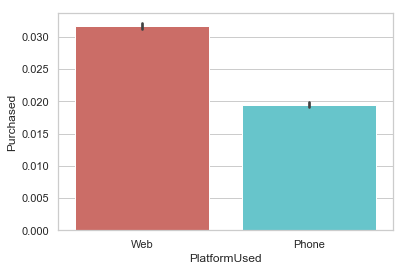

In [125]:
sns.barplot( x = 'PlatformUsed', y = 'Purchased',data = data, palette = 'hls')
# Among all people, people buy a lot more (3.2 %) when they are on the Web( 3.2 %) compared to when they are on the phone (1.9%)
# same add to basket rate, but much lower purchase rate

In [186]:
#sns.barplot( x = 'Gender', y = 'Purchased',data = data, palette = 'hls')
# Among all, people purchase more when they are Male, 0.055 vs 0.07 ( 5.5% vs 7.1%)

In [121]:
data_income.columns

Index(['Purchased', 'VisitorGroup', 'PlatformUsed', 'VisitSource',
       'BrowserName', 'OSName', 'Gender', 'IncomeRange',
       'ViewedProductInVisit', 'ViewedSaleInVisit', 'TotalPageViews',
       'PlacedSearch', 'SecondsOnSite', 'ClickedBanner', 'AddedToBasket'],
      dtype='object')

In [129]:
# Split data set into phone user and web user
phone_user = data[data['PlatformUsed'] == 'Phone']
web_user = data[data['PlatformUsed'] == 'Web']

In [187]:
#sns.barplot( x = 'Gender', y = 'Purchased',data = phone_user , palette = 'hls')
# Among all phone users, male purchase slightly more than women (0.054 vs. 0.047) or 5.4% vs 4.7%

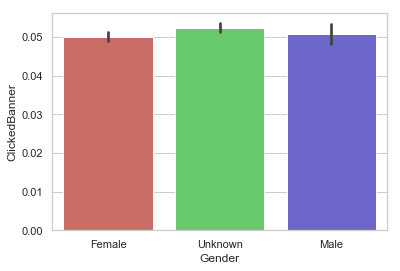

In [133]:
sns.barplot( x = 'Gender', y = 'ClickedBanner',data = phone_user , palette = 'hls')
# Among all phone users, male have the same click banner rate as women, 5%
# Male purchase more if they are using phone, they have the same rate of clicking like women on the banner.

In [189]:
#sns.barplot( x = 'Gender', y = 'ClickedBanner',data = web_user , palette = 'hls')
# Among all web users, women click to banner more( 6.1%) while men click on banner less 5.1%
# Male purchase more if they are using web, but they don't click Banner on the webas much as women.


In [188]:
# sns.barplot( x = 'Gender', y = 'Purchased',data = web_user , palette = 'hls')
# Male purchase more if they are using web 8.1% vs. 6.1% ( women)

In [146]:
# Split by gender
data_gender = data.dropna(axis = 0, subset = ['Gender'])
male = data_gender[data_gender['Gender'] == 'Male'].drop(['Gender'], axis = 1)
female = data_gender[data_gender['Gender'] == 'Female'].drop(['Gender'], axis =1)

In [164]:
def create_dummy_gender(df):
    category_vars= ['VisitorGroup', 'PlatformUsed', 'VisitSource','BrowserName', 'OSName','IncomeRange']
    df = pd.get_dummies(df, columns = category_vars, drop_first = True)
    return df
    
def logistic_model_gender(df):    
    df = create_dummy_gender(df)
    print(df.columns)
    logr = LogisticRegression()
    X = df.iloc[:,1:].values
    y = df.iloc[:,0].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 30)
    logr.fit(X_train,y_train)
    y_pred_test = logr.predict(X_test)
    y_pred_train = logr.predict(X_train)
    coefs = logr.coef_
    intercept = logr.intercept_        
    log_reg = sm.Logit(y_train, X_train)
    clf = log_reg.fit()
    column_names = list(df.columns)
    summary = clf.summary(xname = column_names[1:])
    #odd ratios only    
    print(summary)
    print(np.exp(clf.params))
    

In [165]:
logistic_model_gender(male)
# Among male, Clicking the Banner and Seconds on site doesn't help explaning whether they purchase or not
# Which means Clicking banner doesn't matter to males

Index(['Purchased', 'ViewedProductInVisit', 'ViewedSaleInVisit',
       'TotalPageViews', 'PlacedSearch', 'SecondsOnSite', 'ClickedBanner',
       'AddedToBasket', 'VisitorGroup_Prior Visitor',
       'VisitorGroup_Prior Visitor with Purchase', 'PlatformUsed_Web',
       'VisitSource_ThirdPartyAds', 'VisitSource_WebSearch',
       'BrowserName_Microsoft Edge', 'BrowserName_Safari', 'OSName_Chrome OS',
       'OSName_Linux', 'OSName_Mac OS X', 'OSName_Other/Unknown',
       'OSName_Windows', 'OSName_iOS', 'IncomeRange_50to100k',
       'IncomeRange_Under50k'],
      dtype='object')


C:\Users\gradadm09\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


         Current function value: 0.176356
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                51075
Model:                          Logit   Df Residuals:                    51053
Method:                           MLE   Df Model:                           21
Date:                Sun, 03 Mar 2019   Pseudo R-squ.:                  0.3153
Time:                        07:57:28   Log-Likelihood:                -9007.4
converged:                      False   LL-Null:                       -13155.
                                        LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
ViewedProductInVisit                        -0.6726      0.068     -9.866      0.000

C:\Users\gradadm09\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [166]:
logistic_model_gender(female)

Index(['Purchased', 'ViewedProductInVisit', 'ViewedSaleInVisit',
       'TotalPageViews', 'PlacedSearch', 'SecondsOnSite', 'ClickedBanner',
       'AddedToBasket', 'VisitorGroup_Prior Visitor',
       'VisitorGroup_Prior Visitor with Purchase', 'PlatformUsed_Web',
       'VisitSource_ThirdPartyAds', 'VisitSource_WebSearch',
       'BrowserName_Microsoft Edge', 'BrowserName_Safari', 'OSName_Chrome OS',
       'OSName_Linux', 'OSName_Mac OS X', 'OSName_Other/Unknown',
       'OSName_Windows', 'OSName_iOS', 'IncomeRange_50to100k',
       'IncomeRange_Under50k'],
      dtype='object')


C:\Users\gradadm09\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Optimization terminated successfully.
         Current function value: 0.152032
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               222230
Model:                          Logit   Df Residuals:                   222208
Method:                           MLE   Df Model:                           21
Date:                Sun, 03 Mar 2019   Pseudo R-squ.:                  0.2883
Time:                        08:01:36   Log-Likelihood:                -33786.
converged:                       True   LL-Null:                       -47474.
                                        LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
ViewedProductInVisit                        -0.6

In [ ]:
# If you are Female, Clicked to Banner does explain whether you purchase or not.
# But clicked to Banner reduces the odd that you will purchase by 0.799
